**Importing modules and loading data**

In [1]:
%run ./echino_loader.ipynb
tile_size = 500 # pixels

Imports complete
Loaded 92 images from /pml/wsi_data 

Paths are all set, dataset splitting done 



In [4]:
caseRandomizer()

Loaded 92 images from /pml/wsi_data 



(['echino_76_3',
  'echino61',
  'echino_72_002',
  'echino51',
  'echino_77_1',
  'norm25',
  'Normalliver16',
  'echino28',
  'norm12',
  'normal_70',
  'echino_79_1',
  'echino24',
  'normal3',
  'echino38',
  'echino26',
  'echino17',
  'echino36',
  'echino_69_03',
  'echino50',
  'echino_69_3',
  'norm_79_1',
  'echino39',
  'echino14',
  'norm26',
  'echino41',
  'normal2',
  'Norm21',
  'Normalliver19',
  'echino31',
  'echino32',
  'echino13',
  'echino_71_2',
  'Norm22',
  'echino19',
  'echino23',
  'normal5',
  'normal1',
  'normal4',
  'Norm20',
  'echino_72_001',
  'echino_78_2',
  'normal6',
  'echino_74_001',
  'normal8',
  'echino8',
  'echino_69_02',
  'echino3',
  'norm13',
  'echino60',
  'Normalliver18',
  'echino25',
  'echino_69_1',
  'echino_75_002',
  'echino_71_002',
  'normal_69_1'],
 ['normal7',
  'echino40',
  'norm_80_0001',
  'echino52',
  'echino_71_003',
  'norm_75_001',
  'norm_72_01',
  'norm_69_01',
  'echino_69_4',
  'echino_76_1',
  'echino_72_2',


**Tissue detection**

In [5]:
# it checks for existing pml files
tissueDetection(tile_size)

pml file exists for echino_76_3 as /pml/slides/echino_76_3.pml
pml file exists for echino61 as /pml/slides/echino61.pml
pml file exists for echino_72_002 as /pml/slides/echino_72_002.pml
pml file exists for echino51 as /pml/slides/echino51.pml
pml file exists for echino_77_1 as /pml/slides/echino_77_1.pml
pml file exists for norm25 as /pml/slides/norm25.pml
pml file exists for Normalliver16 as /pml/slides/Normalliver16.pml
pml file exists for echino28 as /pml/slides/echino28.pml
pml file exists for norm12 as /pml/slides/norm12.pml
pml file exists for normal_70 as /pml/slides/normal_70.pml
pml file exists for echino_79_1 as /pml/slides/echino_79_1.pml
pml file exists for echino24 as /pml/slides/echino24.pml
pml file exists for normal3 as /pml/slides/normal3.pml
pml file exists for echino38 as /pml/slides/echino38.pml
pml file exists for echino26 as /pml/slides/echino26.pml
pml file exists for echino17 as /pml/slides/echino17.pml
pml file exists for echino36 as /pml/slides/echino36.pml
p

**checking tissue detection results**

In [6]:
#detectionchecking()

**Tile extraction**

In [7]:
#eliminate unwanted directories
#instead of (dev/pathml-tutorial/analysis/tiles$ find -name echinococcus -exec rm -rf {} \;)

# Search for unwanted files and directories
# tiles_to_remove = Path(analysis_dir_path).glob("**/*echinococcus*")
# files = [x for x in p if x.is_file()]
# print(tiles_to_remove)

# Actual delete operation - uncomment to run
# tiles_to_remove.unlink()


#%store -d global_channel_sums
#%store -d global_channel_squared_sums
#%store -d global_tile_count
#global_channel_sums = None
#global_channel_squared_sums = None
#global_tile_count = None

In [8]:
if (not 'global_channel_sums' in globals()) or (not 'global_channel_squared_sums' in globals()) or (not 'global_tile_count' in globals()):
    %store -r global_channel_sums
    %store -r global_channel_squared_sums
    %store -r global_tile_count   
    
if global_tile_count is None: 
    tilextractor(tile_size)
elif (global_tile_count == 0) or (not 'global_channel_sums' in globals()) or (not 'global_channel_squared_sums' in globals()) or (not 'global_tile_count' in globals()):
    # if no global vars exist, re-run tile extraction
    print("Generating new tiles")
    tilextractor(tile_size)

print(f"global_tile_count: {global_tile_count}")    
print(f"global_channel_squared_sums: {global_channel_squared_sums}")    
print(f"global_channel_sums: {global_channel_sums}")


global_tile_count: 26921
global_channel_squared_sums: [4.13582480e+09 2.53607573e+09 3.46920710e+09]
global_channel_sums: [5.18187987e+09 3.91743521e+09 4.72488794e+09]


In [9]:
%store -r dataloaders
%store -r means_and_stds
%store -r dataset_sizes
%store -r global_channel_sums
%store -r global_channel_squared_sums
%store -r global_tile_count

tileworks(batch_size=48)

Channel means: [0.7699386908059693, 0.5820638477849541, 0.7020375084831544]
Channel standard deviations: [0.14733369058621432, 0.194984973960881, 0.1503600893990749]
Total number of echinococcus tiles: 15756
Total number of non-echninococcus tiles: 11602
Stored 'dataloaders' (dict)
Stored 'means_and_stds' (dict)
Stored 'dataset_sizes' (dict)


**Visualize Batch**

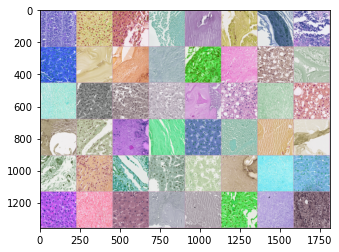

In [38]:
vizBatch()

**Model definition**

In [10]:
print(f"torch.cuda.device_count(): {torch.cuda.device_count()}")

class_names = ['Tumor','non_echinococcus']

model_ft = models.vgg19_bn(pretrained=True, progress=False)
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs, len(class_names))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"using device: {device}")
if torch.cuda.device_count() > 1:
    model_ft = nn.DataParallel(model_ft)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(
    optimizer_ft, step_size=7, gamma=0.1)

# Let`s see the model

print(model_ft.classifier)


torch.cuda.device_count(): 1
using device: cuda:0
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=2, bias=True)
)


**Training**

In [7]:
start_time = time.time()

epochs = 15

model_ft, learningStats = train_classification_model(model_ft, 
                                                     criterion, 
                                                     optimizer_ft, 
                                                     scheduler=exp_lr_scheduler, 
                                                     num_epochs=epochs)

pickle.dump(learningStats, open(os.path.join(analysis_dir_path, 'classification_results', 
    'classification_learning_stats.p'), 'wb'))
torch.save(model_ft, os.path.join(analysis_dir_path, 'classification_results', 'classification_best_model_ft.pt'))

time_elapsed = time.time() - start_time
print('Complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [19:40<00:00,  2.86s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.1359844288615042 0.9483734087694484 0.9469999155752689 0.9483848208727302 0.9483734087694484 0.9483787576150587


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [05:11<00:00,  1.97s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.06426962651213824 0.9789738164506744 0.9771491131274006 0.979270535252807 0.9789738164506744 0.978937061986689


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:25<00:00,  1.66s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.06737108315326308 0.9759042230753687 0.9755873149053915 0.9759313823295606 0.9759042230753687 0.9759130797746095


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:20<00:00,  1.12it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.1041681133269775 0.9543771489024068 0.9504856535679481 0.955640558486443 0.9543771489024068 0.9541861887917436


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:24<00:00,  1.66s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.050163629488704495 0.9821681147706608 0.9820478069502794 0.9821922387057563 0.9821681147706608 0.9821749695082688


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:19<00:00,  1.13it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.1059007023728909 0.9579476329013489 0.9533625916921518 0.9599810725474109 0.9579476329013489 0.9577219478666767


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:22<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.040723687746526495 0.985350575873914 0.9851566707669515 0.9853606140611348 0.985350575873914 0.9853538496012724


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:18<00:00,  1.14it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.10644663624412261 0.9530547474213171 0.9486029777211141 0.9548158716216214 0.9530547474213171 0.9528179296815629


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:20<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.032085601279209446 0.9880278844210951 0.9878672652979613 0.9880344973929178 0.9880278844210951 0.9880300488259425


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:18<00:00,  1.14it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.05354020461101155 0.9789738164506744 0.976907659046717 0.9793821936920524 0.9789738164506744 0.9789306174614434


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:21<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.026429878903972918 0.9900990099009901 0.9899369941202862 0.990102419584335 0.9900990099009901 0.9901002059058515


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:18<00:00,  1.14it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.09397029811238067 0.9633694789738164 0.9590503302104185 0.9652600984610419 0.9633694789738164 0.9631846944275857


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:22<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.02646870563430861 0.9904526166902404 0.9903093879240591 0.9904562558818077 0.9904526166902404 0.9904538519614033


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:19<00:00,  1.13it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.05764843377005629 0.9772546945252578 0.9755738873929867 0.9774791122031814 0.9772546945252578 0.977219603225513


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:23<00:00,  1.66s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.021874363277645966 0.9923721964033138 0.9920238892696104 0.9923713757831488 0.9923721964033138 0.9923711999681167


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:18<00:00,  1.14it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.07019336047663366 0.9711716477122454 0.9683562666296361 0.9719154301548036 0.9711716477122454 0.9710873182468707


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:22<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.016357318282676503 0.9949484744392807 0.9949079109500829 0.9949502727816618 0.9949484744392807 0.9949489978096927


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:19<00:00,  1.13it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.0676481235571377 0.9719650886008993 0.9692202726489844 0.9726741699350525 0.9719650886008993 0.9718854320316885


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:21<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.014944257327093586 0.9946958981612447 0.9945180988365293 0.9946956690540384 0.9946958981612447 0.9946957601142995


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:18<00:00,  1.14it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.0704377602812428 0.9714361280084634 0.9684732386622679 0.9722865893922864 0.9714361280084634 0.9713465070299703


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:20<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.014532396933184302 0.9952515659729239 0.9951676737001045 0.9952522468889654 0.9952515659729239 0.9952518124311787


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:18<00:00,  1.14it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.08490655717903764 0.9660142819359958 0.9624535007830608 0.9672356554633622 0.9660142819359958 0.9658813922250507


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:20<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.016422970421779936 0.9944938371388159 0.9944142609319291 0.9944951162891379 0.9944938371388159 0.9944942654064651


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:18<00:00,  1.14it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.07123233401432094 0.9710394075641364 0.9682374170931494 0.9717722033518733 0.9710394075641364 0.9709553002733317


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:22<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.015169266982118932 0.9944938371388159 0.9944835981940101 0.9944969583223802 0.9944938371388159 0.9944946440121255


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:18<00:00,  1.14it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.09619171291942462 0.9617825971965088 0.9575335904923206 0.9635583568329659 0.9617825971965088 0.9615954084309196


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:25<00:00,  1.66s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.016733425935681834 0.9938876540715296 0.9937560609077241 0.9938883133607347 0.9938876540715296 0.9938879185308628


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:19<00:00,  1.13it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.0900583992426719 0.9641629198624703 0.9605179714314762 0.9654187517163392 0.9641629198624703 0.9640195219936292


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 413/413 [11:21<00:00,  1.65s/it]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
train 0.014199809575543305 0.9946958981612447 0.99457010178309 0.9946962207022217 0.9946958981612447 0.9946960359432442


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [02:19<00:00,  1.13it/s]


Phase Loss: {:.4f} Acc: {:.4f} Weighted Acc: {:.4f} Weighted Pre: {:.4f} Weighted Rec: {:.4f} Weighted F1: {:.4f}
val 0.10393070416040748 0.9580798730494579 0.9536323500290659 0.9599677546635329 0.9580798730494579 0.9578642773845959
Complete in 216m 48s


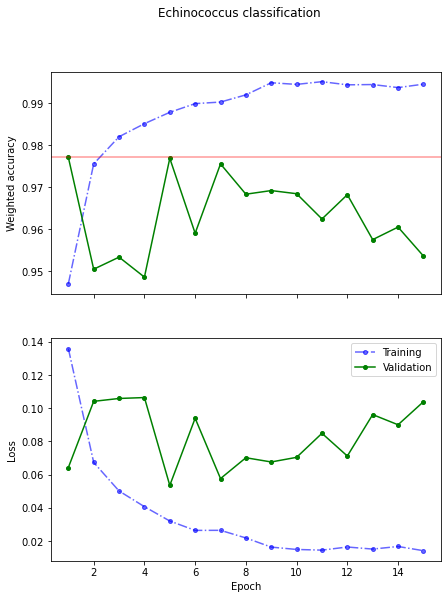

In [8]:
plotLearningCurve()

**Tile level prediction**

In [9]:
start_time = time.time()

class_names = ['Tumor','non_echinococcus']
means_and_stds = pickle.load(open(os.path.join(analysis_dir_path, 'classification_results', 'trainval_channel_means_and_stds.p'), 'rb'))
modelPath = glob.glob(os.path.join(analysis_dir_path, 'classification_results', 'classification_best_model_ft*'))[0]

dataTransforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(means_and_stds['channel_means'], means_and_stds['channel_stds'])])

trainedModel = models.vgg19_bn(pretrained=False)
num_ftrs = trainedModel.classifier[6].in_features
trainedModel.classifier[6] = nn.Linear(num_ftrs, len(class_names))
trainedModel.load_state_dict(torch.load(modelPath))

for case in val_cases + test_cases:
    pathml_slide = Slide(os.path.join(pathml_slide_dir_path, case+'.pml'))
    pathml_slide.inferClassifier(trainedModel, classNames=class_names, dataTransforms=dataTransforms, tissueLevelThreshold=0.995, foregroundLevelThreshold=88, numWorkers=0, overwriteExistingClassifications=True)
    pathml_slide.save(folder=pathml_slide_dir_path)

time_elapsed = time.time() - start_time
print('Complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:31<00:00,  2.64s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [02:13<00:00,  2.72s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [06:30<00:00,  2.59s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [03:16<00:00,  2.62s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [03:27<00:00,  2.59s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 141/141 [05:57<00:00,  2.53s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:13<00:00,  2.54s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [06:26<00:00,  2.59s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [03:25<00:00,  2.60s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 174/174 [07:29<00:00,  2.58s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [02:48<00:00,  2.63s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [03:28<00:00,  2.70s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [01:03<00:00,  2.67s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:54<00:00,  2.46s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 78/78 [03:33<00:00,  2.73s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [04:08<00:00,  2.54s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [01:58<00:00,  2.68s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [06:25<00:00,  2.58s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.68s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 194/194 [08:21<00:00,  2.59s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [05:03<00:00,  2.59s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [01:17<00:00,  2.76s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 116/116 [05:01<00:00,  2.60s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [02:25<00:00,  2.65s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [07:57<00:00,  2.60s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 136/136 [05:49<00:00,  2.57s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 123/123 [05:15<00:00,  2.56s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104/104 [04:22<00:00,  2.52s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [04:15<00:00,  2.72s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [02:39<00:00,  2.62s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [03:55<00:00,  2.56s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [04:35<00:00,  2.57s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [03:37<00:00,  2.66s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 155/155 [06:38<00:00,  2.57s/it]


Inferring model on GPU


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [01:41<00:00,  2.66s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [04:37<00:00,  2.60s/it]


Inferring model on GPU


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153/153 [06:30<00:00,  2.56s/it]

Complete in 152m 25s


**Visualize inference heatmap**


 Visualizing val cases



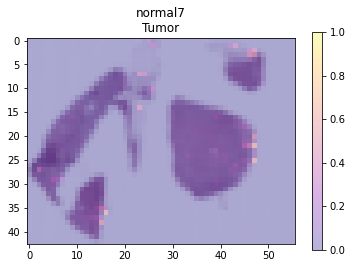

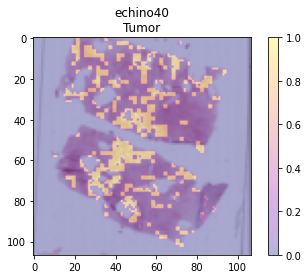

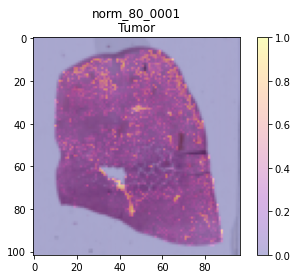

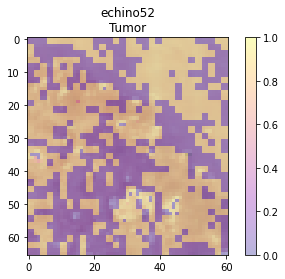

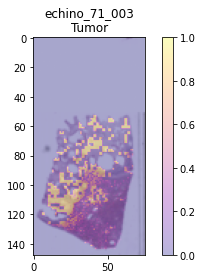

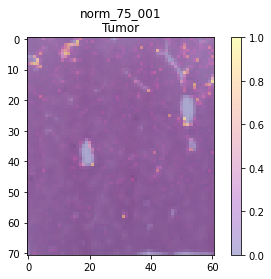

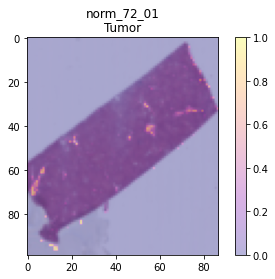

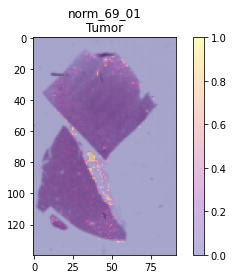

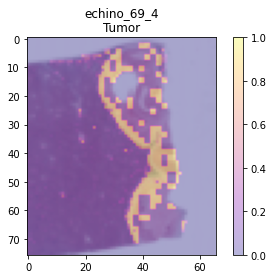

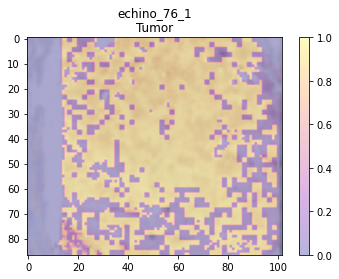

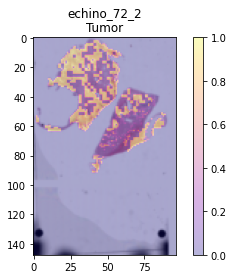

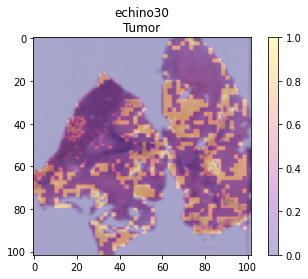

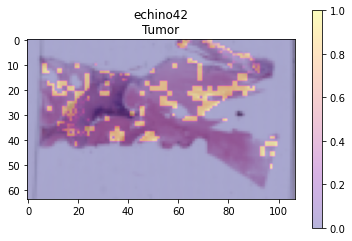

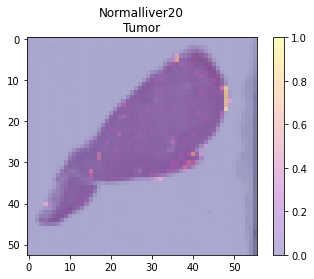

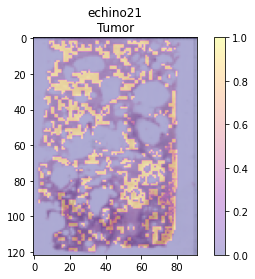

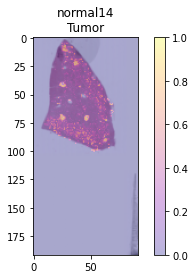

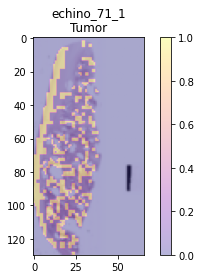

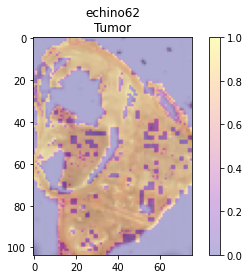

In [10]:
vizInferHeatmap_Val()


 Visualizing test cases



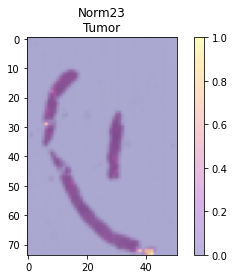

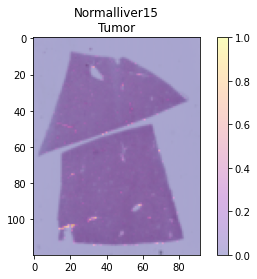

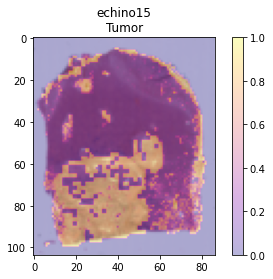

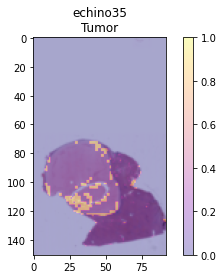

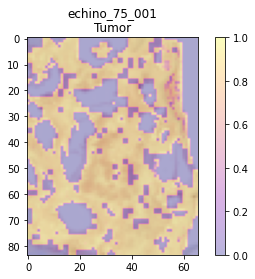

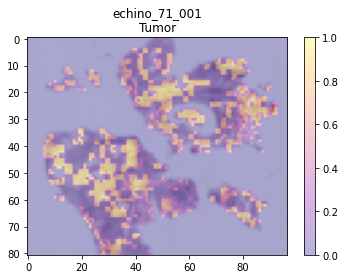

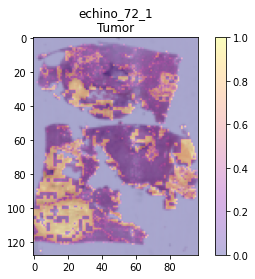

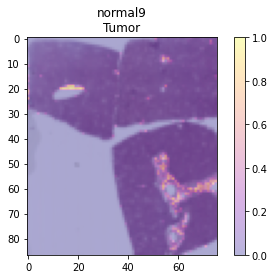

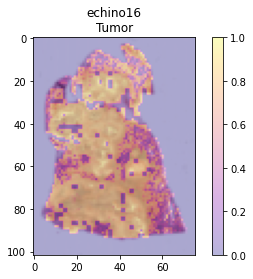

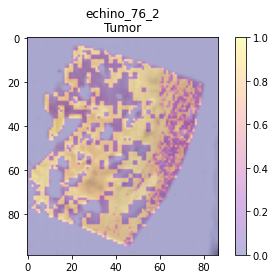

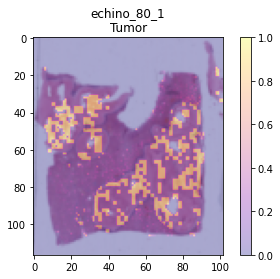

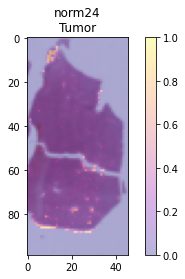

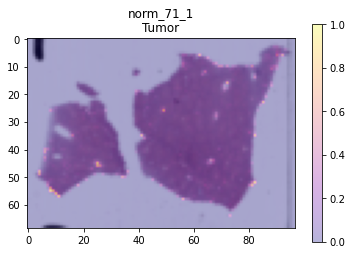

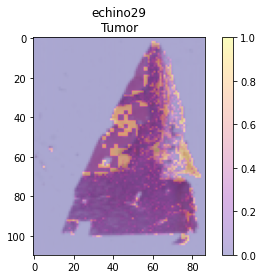

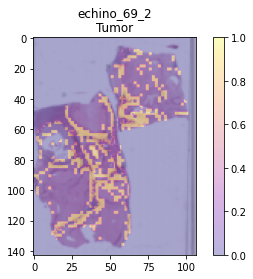

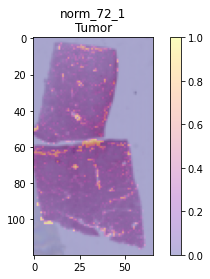

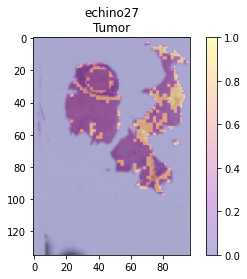

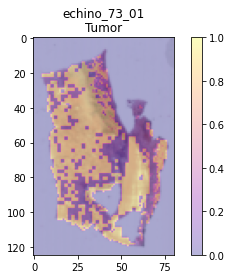

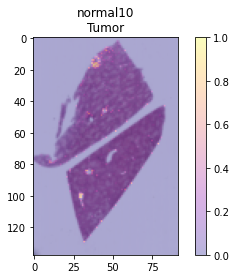

In [11]:
vizInferHeatmap_Test()

**Tile level accuracy by probability thresholds**

Best tile-level validation accuracy: 0.8394018542713071
Threshold that gives the best tile-level validation accuracy: 0.975


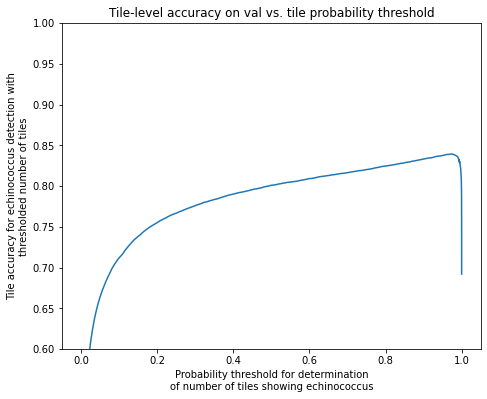

Stored 'best_classification_threshold' (float)


In [12]:
probThresholds()

**Test accuracy**

In [13]:
%store -r best_classification_threshold

testaccuracy()

Average test set accuracy at echinococcus probability threshold of 0.975: 0.8439967211393767
Case-by-case test set accuracies:
         Slide_ID  echinococcus accuracy (>0.975)
0          Norm23                        0.974359
1   Normalliver15                        0.999655
2        echino15                        0.817948
3        echino35                        0.955952
4   echino_75_001                        0.937248
5   echino_71_001                        0.797801
6     echino_72_1                        0.805935
7         normal9                        0.997548
8        echino16                        0.487235
9     echino_76_2                        0.816920
10    echino_80_1                        0.822167
11         norm24                        0.996685
12      norm_71_1                        0.998908
13       echino29                        0.947600
14    echino_69_2                        0.592866
15      norm_72_1                        0.995035
16       echino27      

**Slide level tile counts above threshold**

In [14]:
tilecountslidelevel()


         Slide_ID  echinococcus_ground_truth  echinococcus tile count (>0.975)
0          Norm23                          0                                 3
1   Normalliver15                          0                                 2
2        echino15                          1                              1420
3        echino35                          1                               318
4   echino_75_001                          1                              3230
5   echino_71_001                          1                               488
6     echino_72_1                          1                              1119
7         normal9                          0                                10
8        echino16                          1                              1997
9     echino_76_2                          1                              2186
10    echino_80_1                          1                              1161
11         norm24                          0        

**AUC**

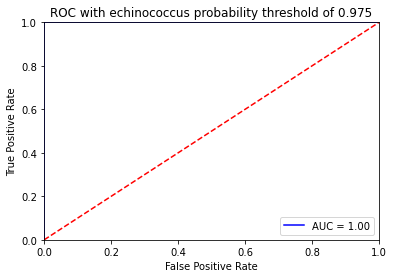

In [15]:
%store -r test_tile_counts_df

finalAUC()
   

**apllying GradCAM**

In [2]:
start_time = time.time()

class_names = ['Tumor','non_echinococcus']
means_and_stds = pickle.load(open(os.path.join(analysis_dir_path, 'classification_results', 'trainval_channel_means_and_stds.p'), 'rb'))
modelPath = glob.glob(os.path.join(analysis_dir_path, 'classification_results', 'classification_best_model_ft*'))[0]

dataTransforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(means_and_stds['channel_means'], means_and_stds['channel_stds'])])

trainedModel = models.vgg19_bn(pretrained=False)
num_ftrs = trainedModel.classifier[6].in_features
trainedModel.classifier[6] = nn.Linear(num_ftrs, len(class_names))
trainedModel.load_state_dict(torch.load(modelPath))


class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        
        # get the pretrained VGG19 network
        self.vgg = trainedModel
        
        # disect the network to access its last convolutional layer
        self.features_conv = self.vgg.features[:52]
        
        # get the max pool of the features stem
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        
        # get the classifier of the vgg19
        self.classifier = self.vgg.classifier
        
        # placeholder for the gradients
        self.gradients = None
    
    # hook for the gradients of the activations
    def activations_hook(self, grad):
        self.gradients = grad
        
    def forward(self, x):
        x = self.features_conv(x)
        
        # register the hook
        h = x.register_hook(self.activations_hook)
        
        # apply the remaining pooling
        x = self.max_pool(x)
        x = x.view((1, -1))
        x = self.classifier(x)
        return x
    
    # method for the gradient extraction
    def get_activations_gradient(self):
        return self.gradients
    
    # method for the activation exctraction
    def get_activations(self, x):
        return self.features_conv(x)




In [3]:



    echninococcus_tiles = glob.glob(os.path.join(tiles_path, 'tiles', '*', 'Tumor', '*.jpg'))
    non_echninococcus_tiles = glob.glob(os.path.join(tiles_path, 'tiles', '*', 'non_echinococcus', '*.jpg'))

    print('Total number of echinococcus tiles:', len(echninococcus_tiles))
    print('Total number of non-echninococcus tiles:', len(non_echninococcus_tiles))

    data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomVerticalFlip(),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0, contrast=0, saturation=1, hue=.5),
        transforms.ToTensor(),
        transforms.Normalize(means_and_stds['channel_means'], means_and_stds['channel_stds'])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(means_and_stds['channel_means'], means_and_stds['channel_stds'])
    ]),
    }
    
  
    
    train_dataset = torch.utils.data.ConcatDataset([datasets.ImageFolder(os.path.join(
            tiles_path, 'tiles', train_case), data_transforms['train']) for train_case in train_cases])
    val_dataset = torch.utils.data.ConcatDataset([datasets.ImageFolder(os.path.join(
            tiles_path, 'tiles', val_case), data_transforms['val']) for val_case in val_cases])

    image_datasets = {'train': train_dataset, 'val': val_dataset}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
    
    dataloaders = {}
    batch_size = 1
    dataloaders['train'] = torch.utils.data.DataLoader(
        image_datasets['train'], batch_size=batch_size, num_workers=0, shuffle=True)
    dataloaders['val'] = torch.utils.data.DataLoader(
        image_datasets['val'], batch_size=batch_size, num_workers=0, shuffle=True)



Total number of echinococcus tiles: 15756
Total number of non-echninococcus tiles: 11602


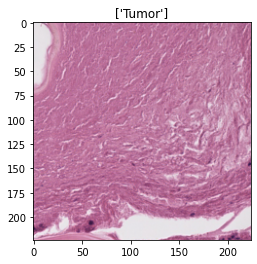

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


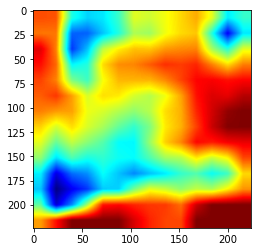

In [21]:


    vgg = VGG()

    # set the evaluation mode
    vgg.eval()

    # get the image from the dataloader

    image_path = 'gradcam.jpg'
    
    def imshow(inp, title=None):
        """Imshow for Tensor."""
        inp = inp.numpy().transpose((1, 2, 0))
        mean = means_and_stds['channel_means']
        std = means_and_stds['channel_stds']
        inp = std * inp + mean
        inp = np.clip(inp, 0, 1)
        plt.imsave(image_path, inp)
        #inp1=plt.figure()
        #plt.savefig('/mnt/d/pml/pic.jpg')# pause a bit so that plots are updated
        plt.imshow(inp)
        if title is not None:
            plt.title(title)
        plt.show()


    img, classes = next(iter(dataloaders['val']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(img)


    imshow(out, title=[class_names[x] for x in classes])




    # get the most likely prediction of the model
    pred = vgg(img)
    pred.argmax(dim=1)
    
    # get the gradient of the output with respect to the parameters of the model
    pred[:, 0].backward()

    # pull the gradients out of the model
    gradients = vgg.get_activations_gradient()

    # pool the gradients across the channels
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

    # get the activations of the last convolutional layer
    activations = vgg.get_activations(img).detach()

    # weight the channels by corresponding gradients
    for i in range(512):
        activations[:, i, :, :] *= pooled_gradients[i]

    # average the channels of the activations
    heatmap = torch.mean(activations, dim=1).squeeze()

    # relu on top of the heatmap
    # expression (2) in https://arxiv.org/pdf/1610.02391.pdf
    heatmap = np.maximum(heatmap, 0)

    # normalize the heatmap
    heatmap /= torch.max(heatmap)

    # draw the heatmap
    #plt.matshow(heatmap.squeeze())
    #plt.show()
    
    superimpimage_path = 'gradcamsuperimposed.jpg'
    img = cv2.imread(image_path)## ide egy echino image
    img = np.array(img)
    heatmap=np.array(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.5 + img
    plt.imshow(superimposed_img) ###it does not show it
    cv2.imwrite( superimpimage_path, superimposed_img)
    
    plt.imshow(heatmap)

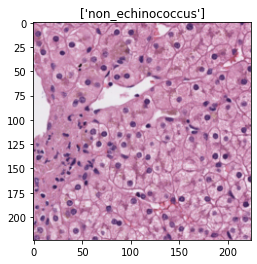

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


~/dev/pml-echino/gradcamimage_511.jpg


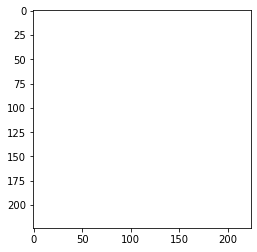

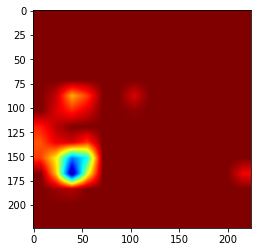

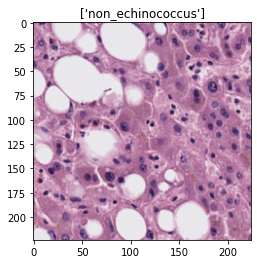

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


~/dev/pml-echino/gradcamimage_511.jpg


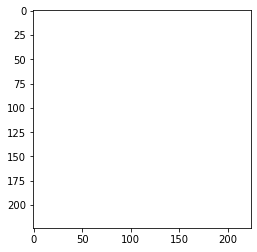

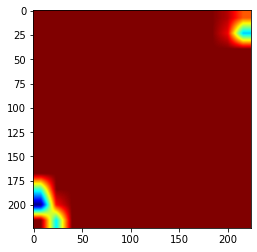

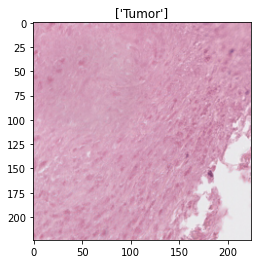

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


~/dev/pml-echino/gradcamimage_511.jpg


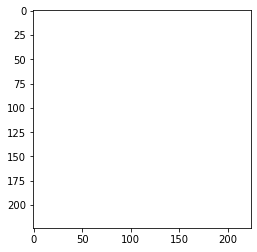

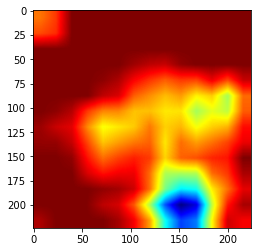

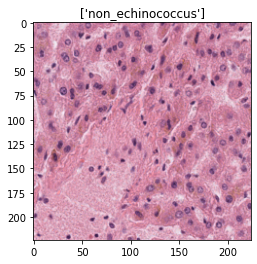

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


~/dev/pml-echino/gradcamimage_511.jpg


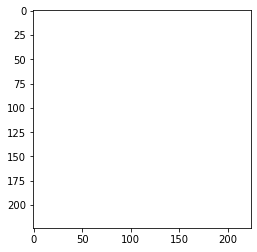

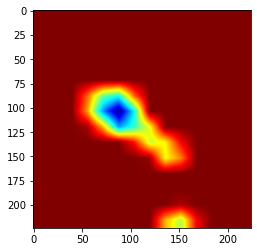

In [15]:
gradcam()

In [16]:
!conda list
import IPython; print(IPython.sys_info())

# packages in environment at /home/ubuntu/.conda/envs/pathml-env:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                      1_llvm    conda-forge
albumentations            1.1.0                    pypi_0    pypi
alsa-lib                  1.2.3                h516909a_0    conda-forge
argcomplete               2.0.0              pyhd8ed1ab_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0           py37h5e8e339_1    conda-forge
async_generator           1.10                       py_0    conda-forge
atk-1.0                   2.36.0               h3371d22_4    conda-forge
attrs                     21.4.0             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-fo

{'commit_hash': '980a41b',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/home/ubuntu/.conda/envs/pathml-env/lib/python3.7/site-packages/IPython',
 'ipython_version': '7.31.0',
 'os_name': 'posix',
 'platform': 'Linux-5.4.0-100-generic-x86_64-with-debian-bullseye-sid',
 'sys_executable': '/home/ubuntu/.conda/envs/pathml-env/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.7.12 | packaged by conda-forge | (default, Oct 26 2021, '
                '06:08:53) \n'
                '[GCC 9.4.0]'}
